In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1494 to 4180
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1494,45.7,16.1,5.30,4.7,45,30.4,35.2,86.2,35,M,in
424,48.2,16.0,5.97,6.7,227,26.8,33.2,80.7,17,M,out
2719,31.3,10.5,4.30,11.7,321,24.4,33.5,72.8,56,M,out
1455,43.9,15.3,5.07,21.5,258,30.2,34.9,86.6,35,F,out
2905,42.7,14.7,5.07,10.0,246,29.0,34.4,84.2,59,M,out


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,209
HAEMOGLOBINS,92
ERYTHROCYTE,222
LEUCOCYTE,146
THROMBOCYTE,250
MCH,112
MCHC,66
MCV,205
AGE,86
SEX,2


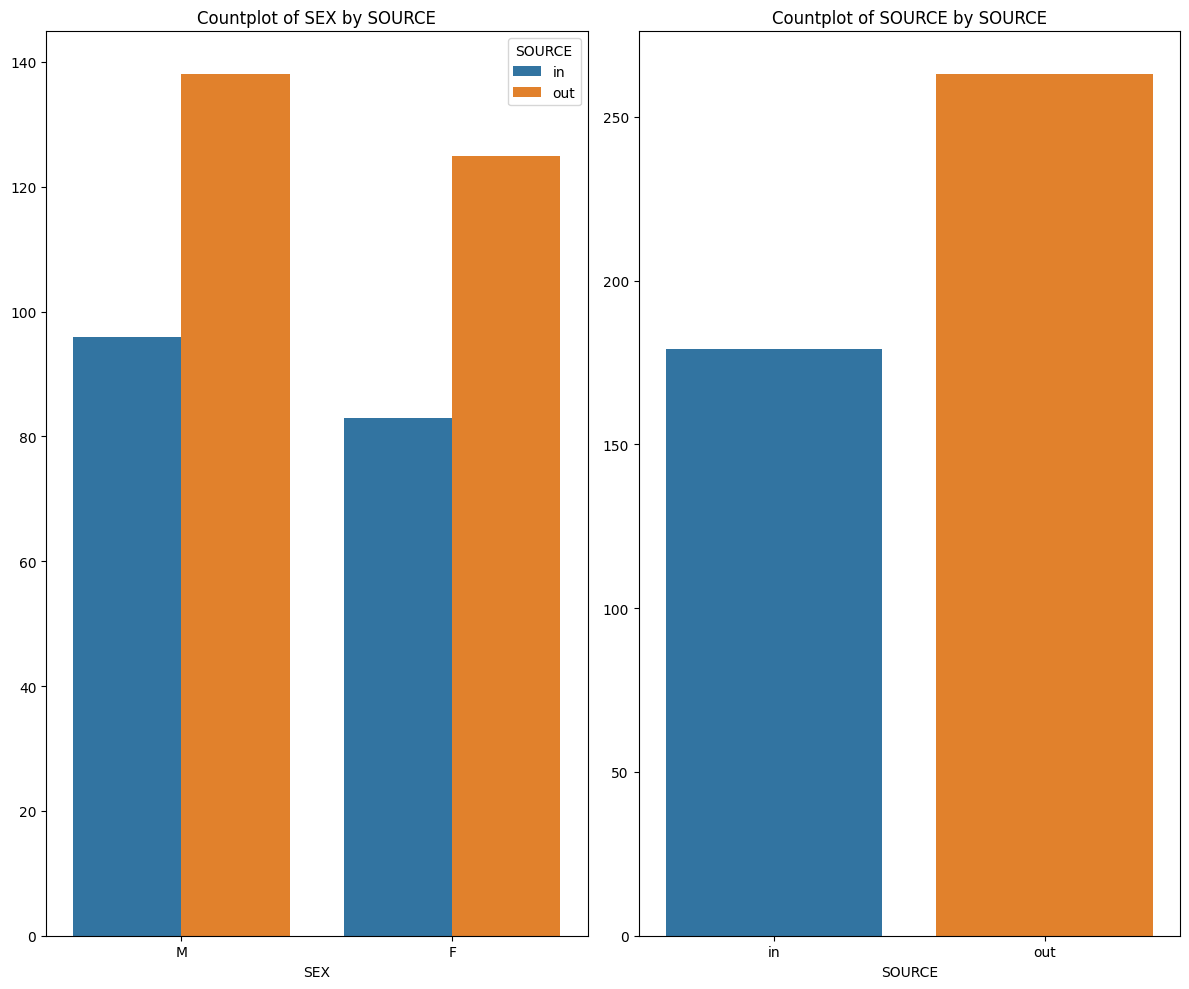

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.402036,6.135671,22.80,34.2250,38.700,42.975,58.10
HAEMOGLOBINS,442.0,12.813122,2.112099,7.30,11.4000,12.900,14.400,18.90
ERYTHROCYTE,442.0,4.602534,0.808449,2.62,4.0725,4.615,5.110,7.86
LEUCOCYTE,442.0,8.838914,5.101903,1.80,5.8000,7.500,10.775,56.70
THROMBOCYTE,442.0,262.816742,108.840083,12.00,200.2500,258.000,322.000,931.00
MCH,442.0,28.019910,2.679224,18.00,26.9000,28.500,29.600,33.40
MCHC,442.0,33.357692,1.242208,29.60,32.7000,33.400,34.100,37.80
MCV,442.0,83.922398,6.756216,59.10,80.7250,84.650,88.100,99.10
AGE,442.0,46.576923,21.881244,1.00,29.2500,48.000,65.000,91.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

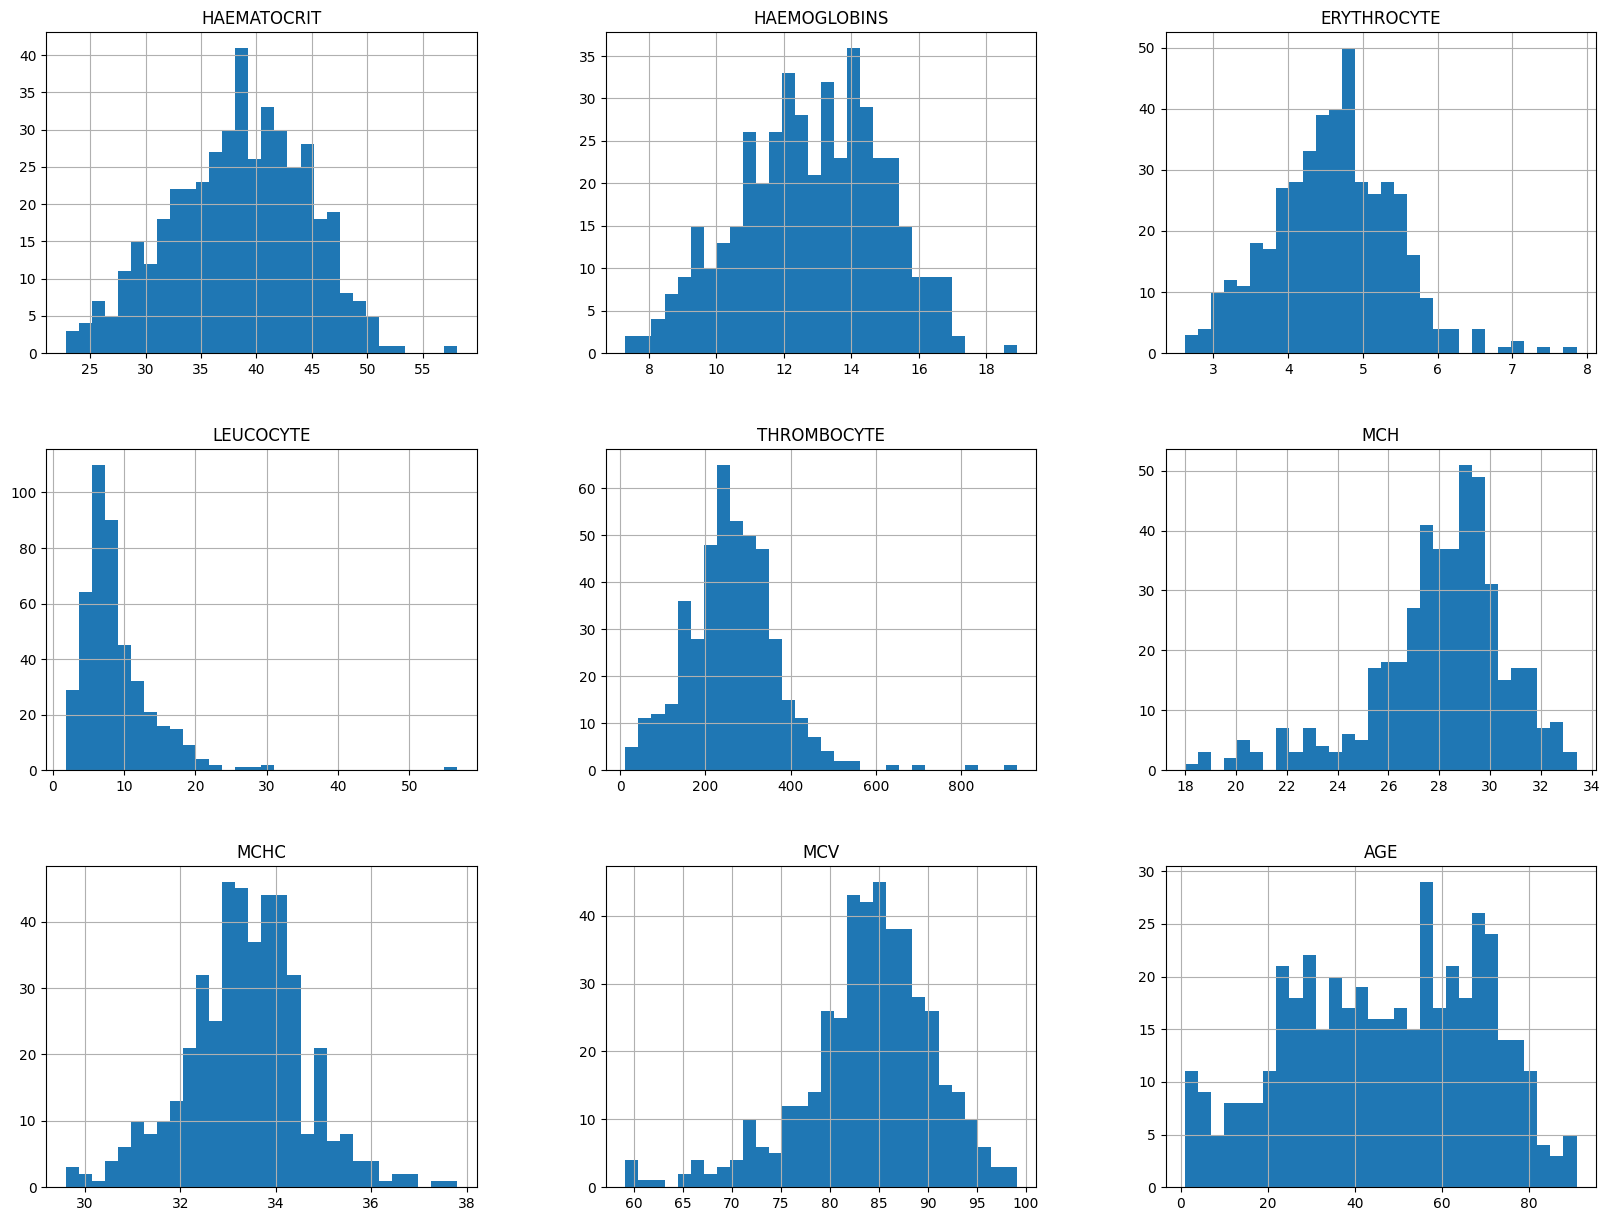

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

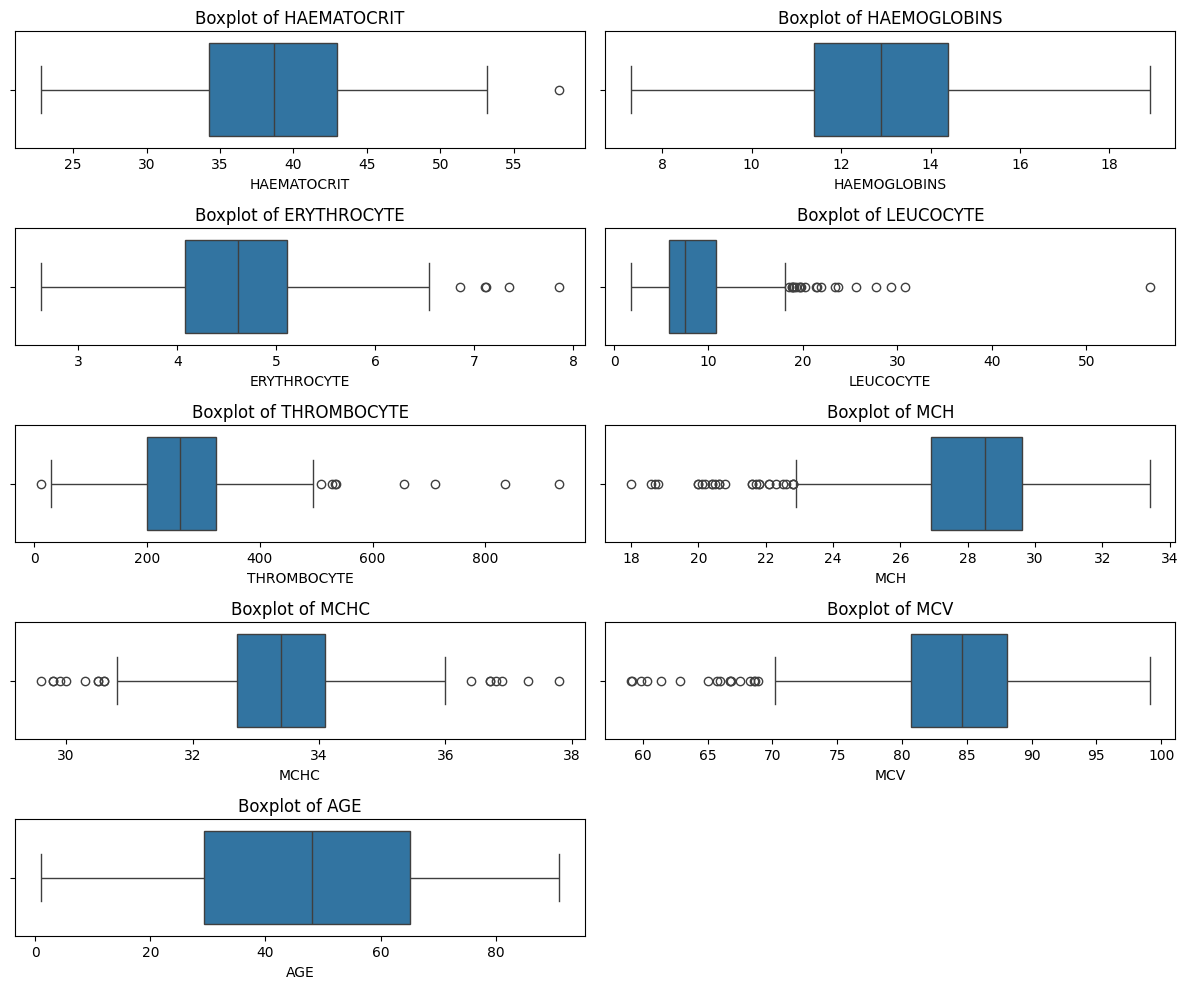

In [8]:
create_boxplots_from_df(df_numerical)

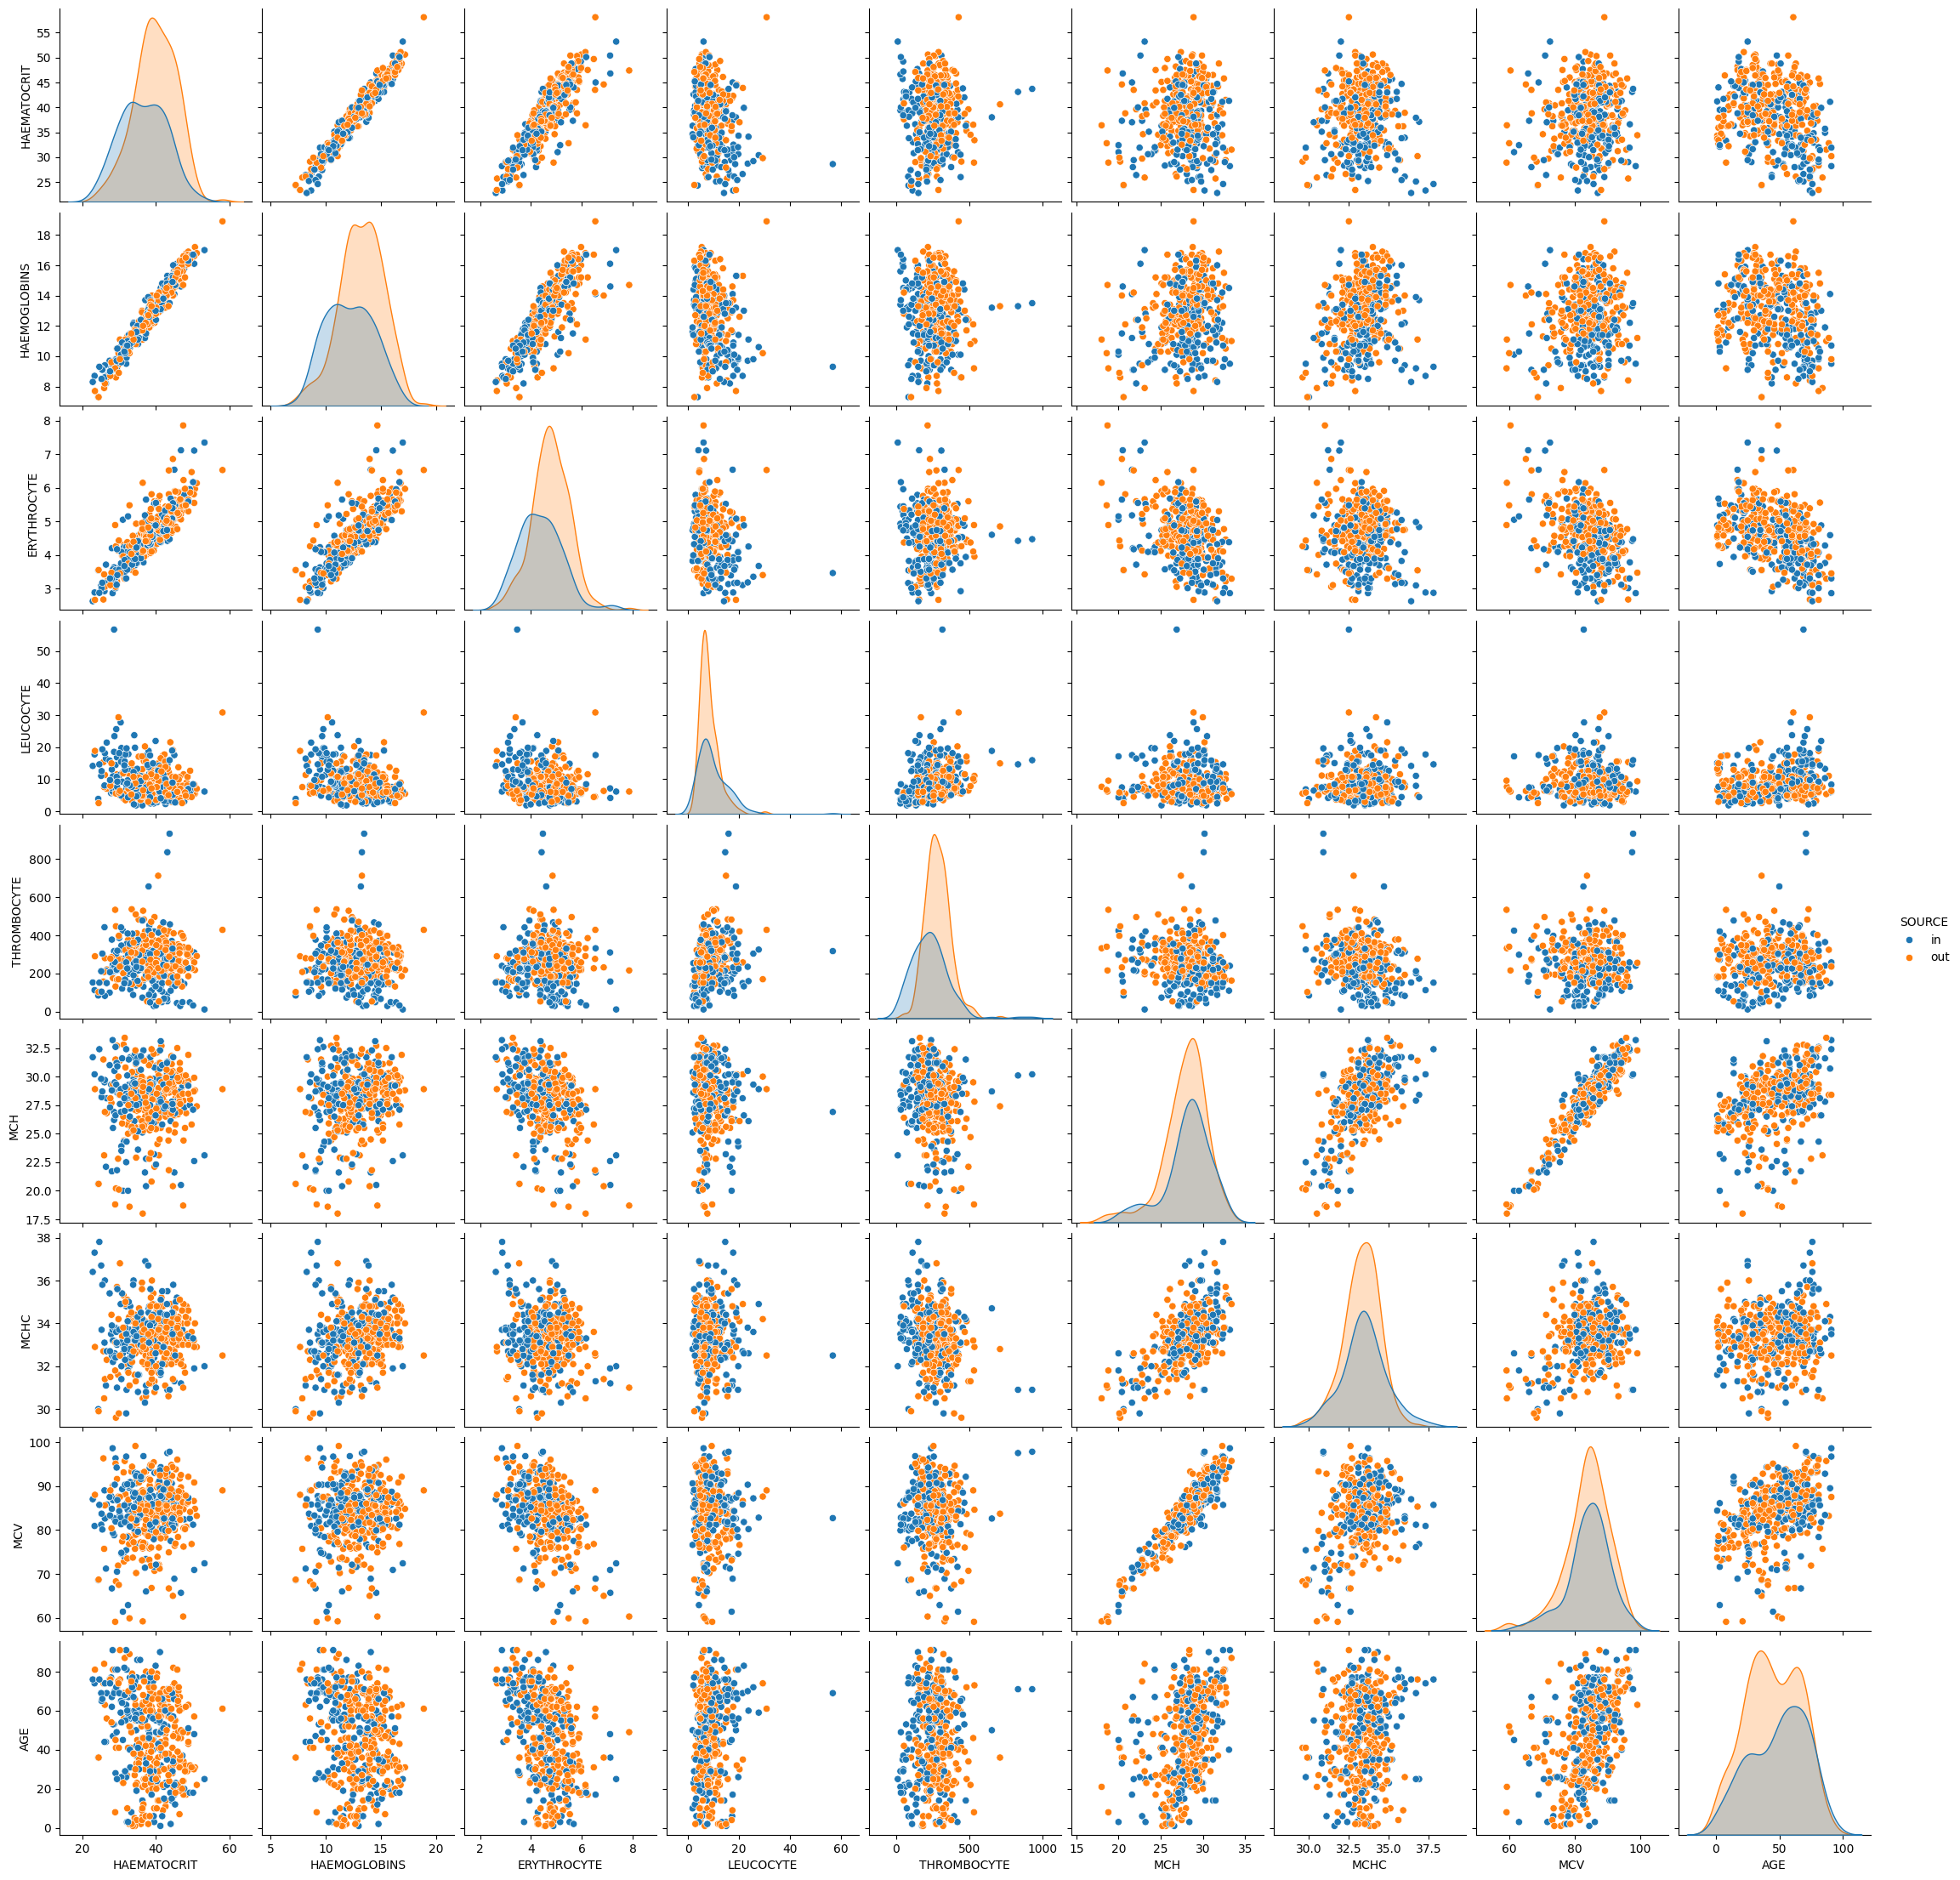

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.977023,0.870016,-0.274110,0.012741,0.076198,0.036233,0.080666,-0.265518
HAEMOGLOBINS,0.977023,1.000000,0.818466,-0.263677,-0.036373,0.201414,0.244197,0.136346,-0.244937
ERYTHROCYTE,0.870016,0.818466,1.000000,-0.246813,0.028339,-0.383522,-0.115211,-0.409729,-0.432187
LEUCOCYTE,-0.274110,-0.263677,-0.246813,1.000000,0.231872,-0.002139,0.038369,-0.014923,0.186226
THROMBOCYTE,0.012741,-0.036373,0.028339,0.231872,1.000000,-0.128717,-0.217805,-0.048259,0.035828
MCH,0.076198,0.201414,-0.383522,-0.002139,-0.128717,1.000000,0.613615,0.930624,0.385596
MCHC,0.036233,0.244197,-0.115211,0.038369,-0.217805,0.613615,1.000000,0.284295,0.078877
MCV,0.080666,0.136346,-0.409729,-0.014923,-0.048259,0.930624,0.284295,1.000000,0.424244
AGE,-0.265518,-0.244937,-0.432187,0.186226,0.035828,0.385596,0.078877,0.424244,1.000000


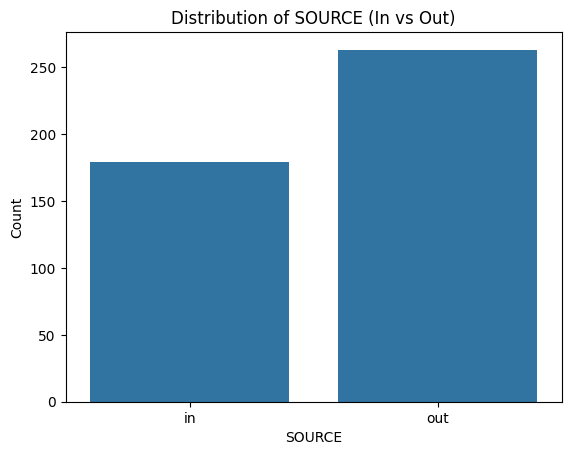

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
